In [21]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Project Setup & Objective Definition
# The goal of this project is to build a binary classification model to predict whether a loan application should be approved or not ('Approved' or 'Not Approved'). We will perform data exploration, preprocessing, train two different models (Logistic Regression and Decision Tree), and evaluate their performance to determine the best model for this task.

# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [23]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
# The dataset is loaded from a CSV file. It's assumed the 'Loan_train.csv' file is in the same directory as the notebook.
# NB: You need to downlad 'Loan_train.csv' from the Kaggle link provided and place it in the same directory as your notebook.
# Load the dataset
df = pd.read_csv("loan_train.csv")
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [25]:
# Exploratory Data Analysis (EDA)
# In this section, we explore the data to understand its structure, find patterns, and identify relationships.
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())




--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

--- First 5 Rows ---
    Loan_ID Gender Married Dependents     Education Self_Employ


--- Target Variable Distribution ---
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


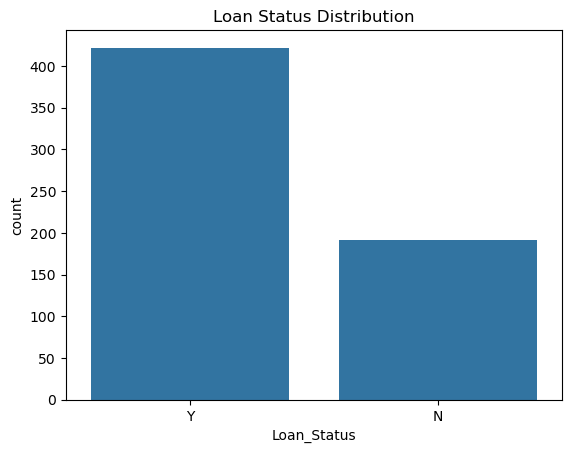

 Class distribution is reasonably balanced.


In [26]:
print("\n--- Target Variable Distribution ---")
class_counts = df['Loan_Status'].value_counts(normalize=True)
print(class_counts)

sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Status Distribution")
plt.show()

# Check for significant class imbalance (e.g., more than 80% in one class)
if class_counts.max() > 0.8:
    print(" Warning: Significant class imbalance detected. Consider using class weighting or resampling techniques.")
else:
    print(" Class distribution is reasonably balanced.")

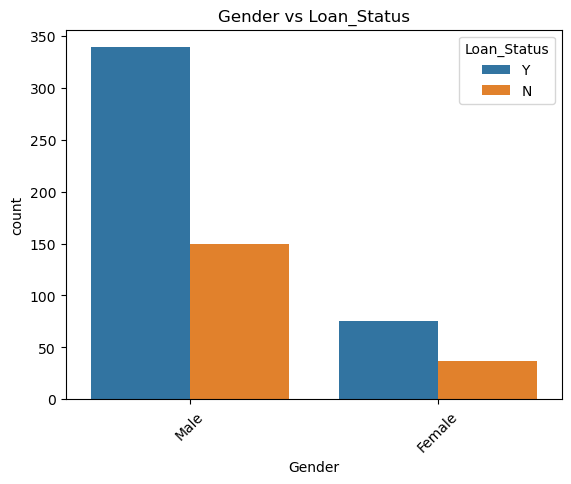

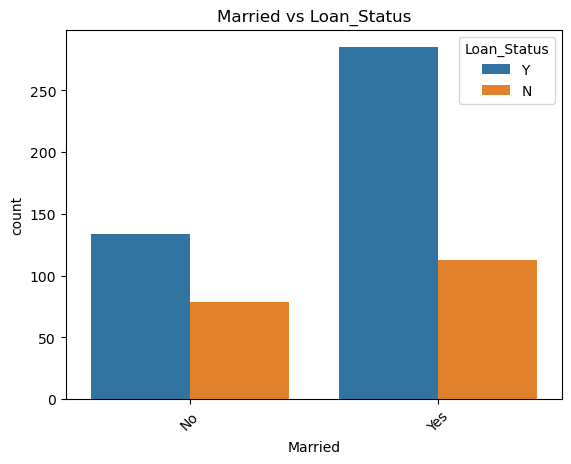

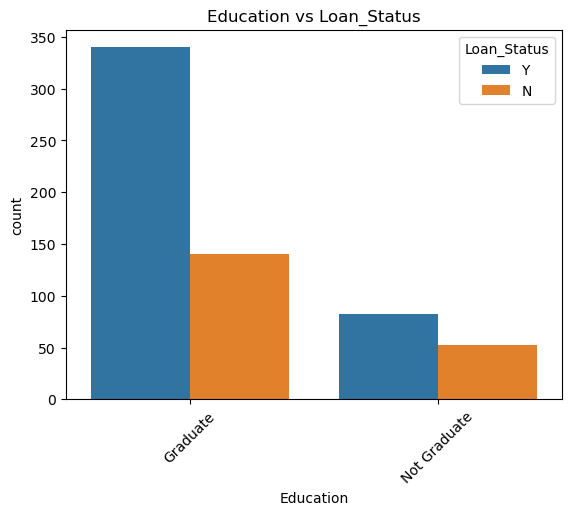

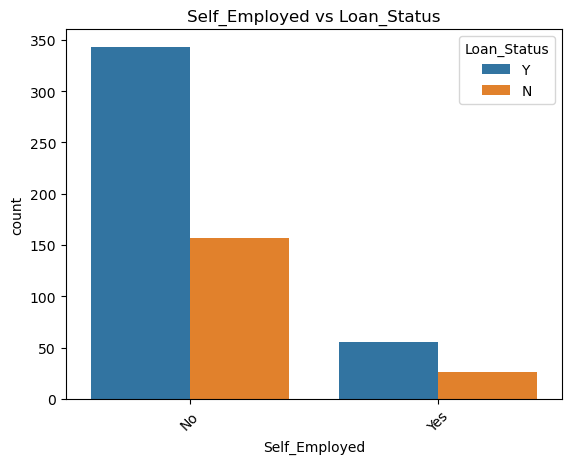

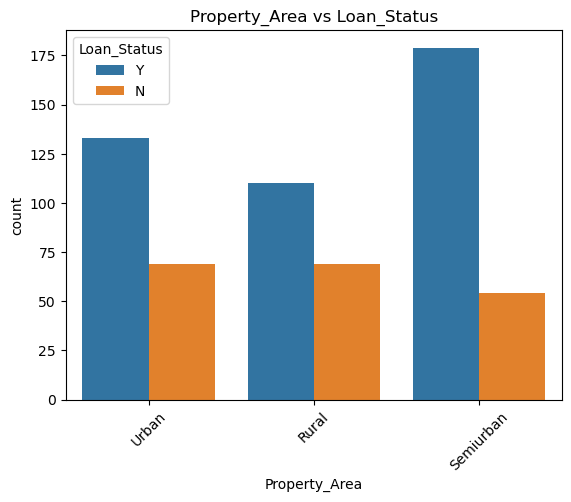

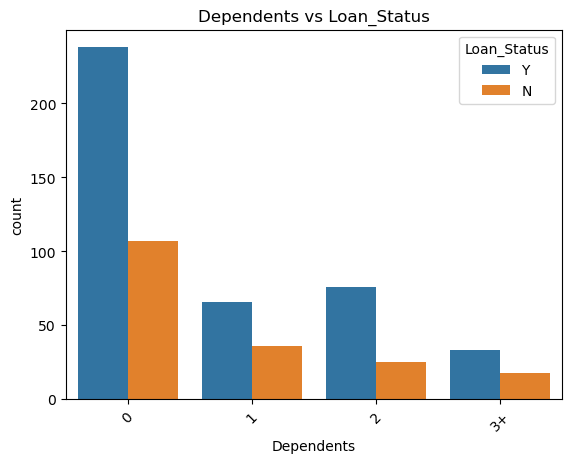

In [27]:
# Visualizing categorical features
def plot_categorical(feature):
    sns.countplot(data=df, x=feature, hue='Loan_Status')
    plt.title(f"{feature} vs Loan_Status")
    plt.xticks(rotation=45)
    plt.show()

categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for feature in categorical_features:
    plot_categorical(feature)

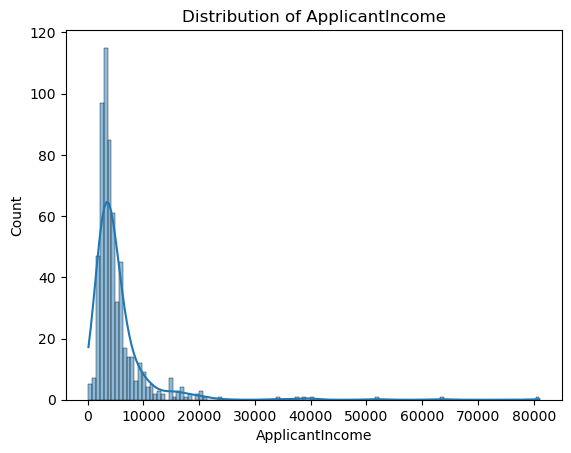

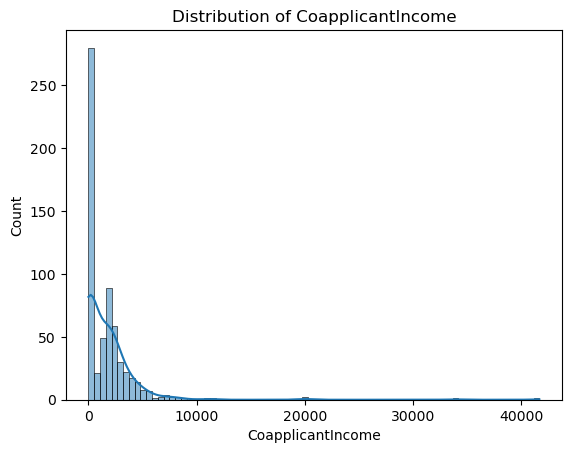

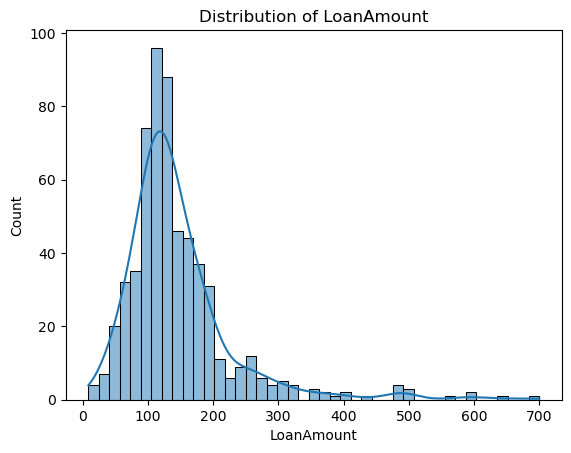

In [28]:
# Visualizing numerical distributions
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for feature in numeric_features:
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.show()

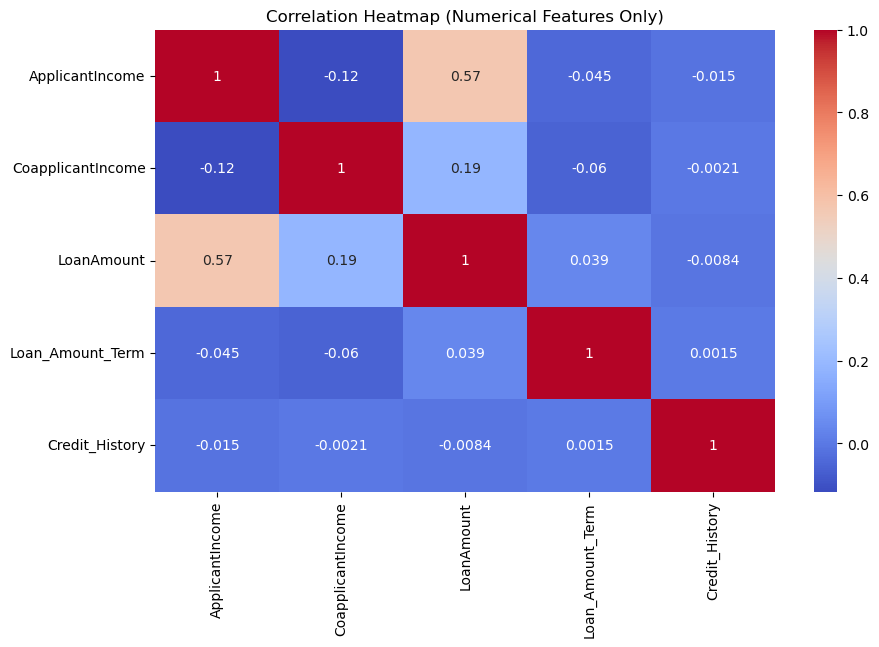

In [29]:
# Correlation heatmap
plt.figure(figsize=(10,6))

# Add numeric_only=True to ignore non-numerical columns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

In [30]:
# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [31]:
# Clean 'Dependents': convert "3+" to 3
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


In [32]:
# Encode categorical variables
label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [33]:
# Optional Scaling
scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

In [34]:
# Could implement feature selection using model-based importance

In [35]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [37]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
def evaluate_model(name, model, X_test, y_test):
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

lr_results = evaluate_model("Logistic Regression", lr, X_test, y_test)
dt_results = evaluate_model("Decision Tree", dt, X_test, y_test)


Model: Logistic Regression
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Model: Decision Tree
Accuracy: 0.6991869918699187
Precision: 0.7654320987654321
Recall: 0.775
F1 Score: 0.7701863354037267
Confusion Matrix:
 [[24 19]
 [18 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.56      0.56        43
           1       0.77      0.78      0.77        80

    accuracy                           0.70       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.7

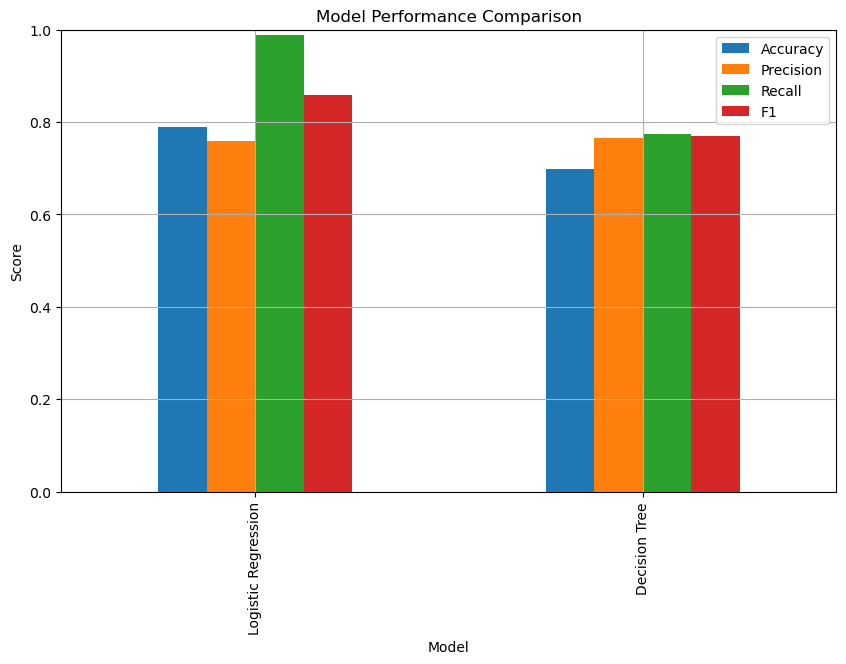

In [39]:
# Compare model performance
results_df = pd.DataFrame([lr_results, dt_results])
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

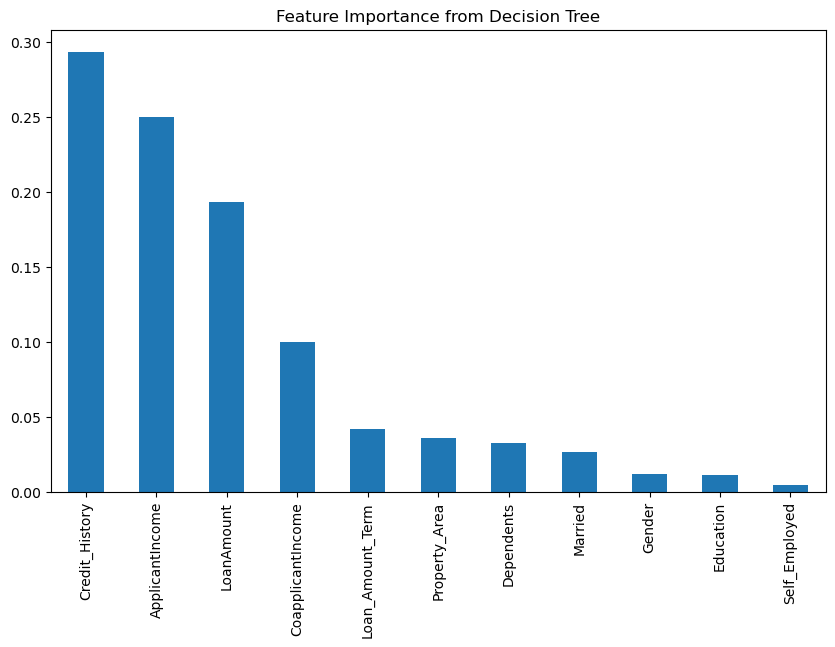

In [40]:
# Feature Importance from Decision Tree
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Feature Importance from Decision Tree")
plt.show()